In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#gamma = ratio of specific heat
UL = float(input('please insert the left value of U:'))
UR = float(input('please insert the right value of U:'))
rho_L = float(input('please insert the left value of density:'))
rho_R = float(input('please insert the right value of density:'))
PL = float(input('please insert the left value of pressure:'))
PR = float(input('please insert the right value of pressure:'))
a = float(input('please insert the sound velocity in gas:'))
rhol= float(input('please insert the incompressible liquid density:'))
#Time  = float(input('please insert the time  between zero and infinity(for example 10):'))
#Delta_T = float(input('please insert the time interval between each computing point:'))
#X_interval = float(input('please insert the lenght interval.(for example if you put 8 , it will consider +8 to -8:'))
#Delta_X = float(input('please insert the x interval between each computing point:'))

please insert the left value of U:1
please insert the right value of U:-1
please insert the left value of density:950
please insert the right value of density:950
please insert the left value of pressure:100000
please insert the right value of pressure:100000
please insert the sound velocity in gas:340
please insert the incompressible liquid density:1000


In [3]:
yL = ((PL*rhol)-(PL*rho_L))/((rho_L*rhol*(a**2))-(PL*rho_L))
yR = ((PR*rhol)-(PR*rho_R))/((rho_R*rhol*(a**2))-(PR*rho_R))

In [5]:
yR

4.55684666210982e-05

In [7]:
def function_fL(p):
    if p > PL:
        f = -1*math.sqrt(((PL/(p*rho_L))-((PL*(1-yL))/(p*rhol))+((1-yL)/rhol)-(1/(rho_L)))*(PL-p))
    if p <= PL:
        f = a*math.sqrt(yL)*math.log(((PL/(p*rho_L))-((PL*(1-yL))/(p*rhol)))*(rho_L/(1-((1-yL)/rhol)*rho_L)))
    return f

def function_fR(p):
    if p > PR:
        f =  math.sqrt(((PR/(p*rho_R))-((PR*(1-yR))/(p*rhol))+((1-yR)/rhol)-(1/(rho_R)))*(PR-p))
    if p <= PR:
        f = -1*a*math.sqrt(yR)*math.log(((PR/(p*rho_R))-((PR*(1-yR))/(p*rhol)))*(rho_R/(1-((1-yR)/rhol)*rho_R)))
    return f
def function(p):
    
    f= function_fL(p) - function_fR(p) + UL-UR
    return f
def function_fL_der(p):
    if p > PL:
        
        f = -0.5*((((PL/(p*rho_L))-((PL*(1-yL))/(p*rhol))+((1-yL)/rhol)-(1/(rho_L)))*(PL-p))**(-0.5))*(((-p**(-2))*((PL/rho_L)-(PL*(1-yL)/rhol))*(PL-p))-(((PL/(p*rho_L))-((PL*(1-yL))/(p*rhol))+((1-yL)/rhol)-(1/(rho_L)))))
    
    if p <= PL:
        
        f = a*math.sqrt(yL)*(((-p**(-2))*((PL/rho_L)-((PL/rhol)*(1-yL))))/((PL/(p*rho_L))-((PL*(1-yL))/(p*rhol))))
        
    return f

def function_fR_der(p):
    
    if p > PR:
        
        f = 0.5*((((PR/(p*rho_R))-((PR*(1-yR))/(p*rhol))+((1-yR)/rhol)-(1/(rho_R)))*(PR-p))**(-0.5))*(((-p**(-2))*((PR/rho_R)-(PR*(1-yR)/rhol))*(PR-p))-(((PR/(p*rho_R))-((PR*(1-yR))/(p*rhol))+((1-yR)/rhol)-(1/(rho_R)))))
        
    if p <=PR:
        
        f = -1*a*math.sqrt(yR)*(((-p**(-2))*((PR/rho_R)-((PR/rhol)*(1-yR))))/((PR/(p*rho_R))-((PR*(1-yR))/(p*rhol))))
        
    return f

def function_der(p):
    
    f = function_fL_der(p) - function_fR_der(p)
    
    return f
def func_c(rho,y):
    f = (rhol*a*math.sqrt(y)/(rhol-(rho*(1-y))))
    return f

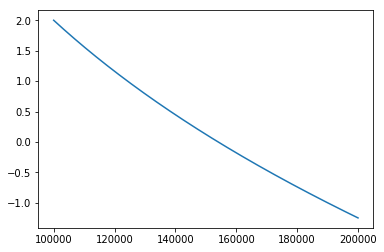

In [8]:
i = np.arange(100000,200000,1)
d = np.array([])

for k in i :
    d =  np.append(d,function(float(k)))
   
plt.plot(i,d)

plt.show()

In [9]:
def newton_solver(guess,TOL):
    x1 = guess+1
    x2 = guess
    i=0
    while abs(x1-x2) > TOL:
        i=i+1
        x1 = x2
        x2 = x1 - (function(x1)/function_der(x1))
        
    return x2,i

In [10]:
pm = newton_solver(120000,0.001)[0]
pm

154083.82532241542

In [11]:
um = 0.5*(UR+UL)+0.5*(function_fL(pm)+function_fR(pm))
um

0.0

In [27]:
rho_m_L = (pm*rho_L*rhol)/((PL*rhol)-(PL*rho_L*(1-yL))+(pm*rho_L*(1-yL)))
rho_m_R = (pm*rho_R*rhol)/((PR*rhol)-(PR*rho_R*(1-yR))+(pm*rho_R*(1-yR)))

In [28]:
SL=(((rho_m_L*um)-(rho_L*UL))/(rho_m_L-rho_L))
SR=(((rho_m_R*um)-(rho_R*UR))/(rho_m_R-rho_R))

In [31]:
SL

In [32]:
SR

31.987303889441712